# Limpeza de dados em um dataset real (dados do titanic)
- Para começar, vamos usar o dataset do Titanic
    - [Titanic](https://www.kaggle.com/competitions/titanic/data)
- Variáveis
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero	
    - Age: Idade em anos	
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic	
    - Parch: Nº de pais/filhos a bordo do Titanic		
    - Ticket: Número do bilhete		
    - Fare:	Tarifa do passageiro	
    - Cabin: Número da cabine	
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base do titanic
titanic = pd.read_csv('train.csv')

In [3]:
# Visualizando a base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Seu formato 
titanic.shape

(891, 12)

In [5]:
# As informações da base (tipo da coluna, linhas não nulas,...)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# O resumo estatístico
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# E a cardinalidade (quantidade de valores vazios em cada uma das colunas)
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# Podemos visualizar diretamente os valores vazios fazendo
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Verificando os valores vazios

- **Começando com o embarque**

In [9]:
# Verificando os registros com embarque vazio
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
# Atualizando o valor para as 2 linhas
titanic.loc[titanic.Embarked.isnull(),'Embarked'] = 'S'

- **Analisando a idade**

In [15]:
# Verificando valores nulos na idade
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
# Podemos verificar o describe para a idade
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

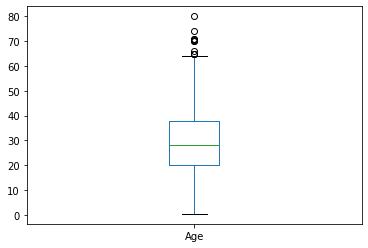

In [17]:
# E podemos visualizar isso graficamente no boxplot
titanic.Age.plot.box();

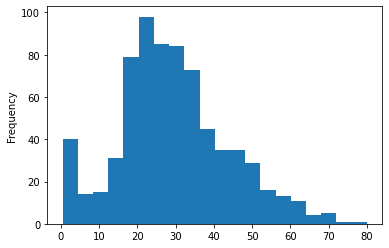

In [19]:
# Ou no histograma
titanic.Age.plot.hist(bins=20);

In [20]:
# Uma opção é usar a mediana, ou a média das idades
titanic.Age.median()

28.0

In [21]:
# Ou podemos, por exemplo, tirar a média de idade por alguns grupos como o Pclass
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [24]:
# Podemos adicionar o gênero
titanic.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

- Para criar uma nova coluna com esses valores, podemos utilizar o [transform](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) do pandas

In [35]:
# Criando uma nova coluna das idades
titanic['Age_Check1'] = titanic.groupby(['Pclass','Sex'])['Age'].transform('median')

In [36]:
# Visualizando a base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Check1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5


In [37]:
# Podemos diretamente utilizar esse valor no fillna
titanic['Age_Check2'] = titanic.Age.fillna(titanic.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [38]:
# Visualizando novamente a base
titanic[titanic.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Check1,Age_Check2


In [39]:
# Podemos então usar esse valor na idade
titanic['Age'] = titanic.Age.fillna(titanic.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [41]:
# E apagar essas duas colunas
titanic = titanic.drop(['Age_Check1','Age_Check2'],axis=1)

In [47]:
# Verificando novamente valores nulos
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- **Então analisando a cabine**

In [45]:
# Verificando as informações em cabine
titanic.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
              ..
D50            1
D19            1
E46            1
C87            1
E17            1
Name: Cabin, Length: 147, dtype: int64

In [46]:
# Podemos simplesmente eliminar essa coluna
titanic = titanic.drop('Cabin',axis=1)

### Verificando a existência de outliers

In [48]:
# Utilizando o describe novamente
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **Será que realmente teve uma taxa de 512?**

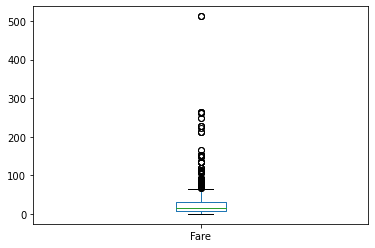

In [49]:
# Verificando o boxplot da taxa
titanic.Fare.plot.box();

In [50]:
# Filtando esse valor
titanic[titanic.Fare == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


- Mesmo que o outlier esteja correto, precisamos analisar se faz sentido para o modelo
    - Esse valor faz sentido com os valores de passagem?
    - Ele pode ocorrer novamente?
    - Etc

**Analisando a base final**

In [51]:
# Base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [52]:
# Voltando na cardinalidade
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

- **Podemos eliminar diretamente as informações que não irão ajudar no nosso modelo, como nome do passageiro e ticket**

In [54]:
# Retirando as colunas PassengerId e Ticket
titanic = titanic.drop(['PassengerId','Ticket'],axis=1)

In [55]:
# Visualizando nossa base final
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [56]:
# Visualizando as informações
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
